In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

['labels.csv', 'train', 'test', 'train.csv', 'sample_submission.csv']


In [21]:
# View
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

In [22]:
from collections import Counter

In [23]:
# Load tabular data
train_df = pd.read_csv("../input/train.csv", index_col=0)
labels_df = pd.read_csv("../input/labels.csv", index_col=0)
sample_df = pd.read_csv("../input/sample_submission.csv", index_col=0)

# Describe

In [24]:
train_df.describe()

,attribute_ids
count,109237
unique,50238
top,13 405 896 1092
freq,1158


In [25]:
labels_df.describe()

,attribute_name
count,1103
unique,1103
top,culture::avon
freq,1


In [26]:
sample_df.describe()

,attribute_ids
count,7443
unique,1
top,0 1 2
freq,7443


# ABC analysis
https://en.wikipedia.org/wiki/ABC_analysis

Too many labels are not appropriate for kernel competition. One of the way is to classify by using only A rank.

In [27]:
flatten = lambda x: [z for y in x for z in (flatten(y) if hasattr(y, '__iter__') and not isinstance(y, str) else (y, ))]

In [28]:
attribute_dist = pd.Series(flatten(list(train_df["attribute_ids"].map(lambda x: x.split(" "))))).value_counts()
attribute_dist = pd.DataFrame(attribute_dist, columns=["Count"])
attribute_dist = attribute_dist.reset_index()
attribute_dist.columns = ["attribute_id", "Count"]
attribute_dist["attribute_name"] = attribute_dist["attribute_id"].map(lambda x: labels_df.loc[int(x)].values[0])
attribute_dist["ratio"] = attribute_dist["Count"] / attribute_dist["Count"].sum()
attribute_dist["cumsum"] = attribute_dist["ratio"].cumsum()
attribute_dist.columns = ["attribute_id", "Count", "attribute_name", "ratio", "cumsum"]
attribute_dist = attribute_dist[["attribute_id", "attribute_name", "Count", "ratio", "cumsum"]]

In [29]:

attribute_dist

,attribute_id,attribute_name,Count,ratio,cumsum
0,813,tag::men,19970,0.057614,0.057614
1,1092,tag::women,14281,0.041201,0.098815
2,147,culture::french,13522,0.039011,0.137826
3,189,culture::italian,10375,0.029932,0.167758
4,13,culture::american,9151,0.026401,0.194159
5,671,tag::flowers,8419,0.024289,0.218448
6,51,culture::british,7615,0.021969,0.240417
7,194,culture::japan,7394,0.021332,0.261749
8,1059,tag::utilitarian objects,6564,0.018937,0.280687
9,121,culture::egyptian,6542,0.018874,0.299560


Text(0, 0.5, 'cumsum')

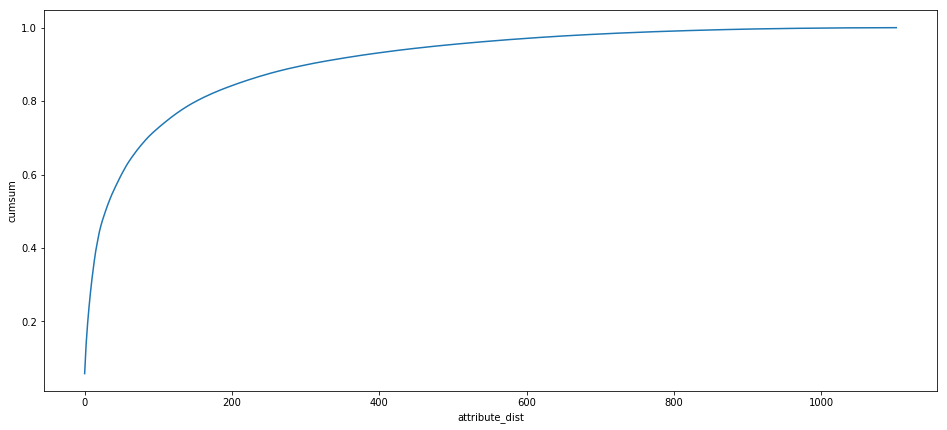

In [30]:
plt.figure(figsize=(16, 7))
plt.plot(attribute_dist["cumsum"])
plt.xlabel("attribute_dist")
plt.ylabel("cumsum")

In [31]:
# Rank A
rank_A = attribute_dist[attribute_dist["cumsum"] <= 0.7]
# Rank B
rank_B = attribute_dist[(attribute_dist["cumsum"] > 0.7) & (attribute_dist["cumsum"] <= 0.9)]
# Rank C
rank_C = attribute_dist[attribute_dist["cumsum"] > 0.9]

In [32]:
len(rank_A), len(rank_B), len(rank_C)

(86, 218, 799)

In [33]:
attribute_dist.to_csv("attribute_distribution.csv")
attribute_dist

,attribute_id,attribute_name,Count,ratio,cumsum
0,813,tag::men,19970,0.057614,0.057614
1,1092,tag::women,14281,0.041201,0.098815
2,147,culture::french,13522,0.039011,0.137826
3,189,culture::italian,10375,0.029932,0.167758
4,13,culture::american,9151,0.026401,0.194159
5,671,tag::flowers,8419,0.024289,0.218448
6,51,culture::british,7615,0.021969,0.240417
7,194,culture::japan,7394,0.021332,0.261749
8,1059,tag::utilitarian objects,6564,0.018937,0.280687
9,121,culture::egyptian,6542,0.018874,0.299560


# To Be Continued